![LogoUC3M](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Acr%C3%B3nimo_y_nombre_de_la_UC3M.svg/320px-Acr%C3%B3nimo_y_nombre_de_la_UC3M.svg.png)

*Alonso Rios Guerra - 100495821 | Guillermo Sancho González - 100495991*


# *__Aprendizaje automático P1: Predicción del abandono de empleados__*

## *__1. Introducción__*

En esta práctica tenemos como objetivo desarrollar diferentes métodos de aprendizaje automático para predecir el abandono de los trabajadores de una empresa.

Primero de todo empezaremos leyendo los datos que nos proporciona la empresa. En nuestro caso, usaremos el dataset Nº10.

In [17]:
import numpy as np
import pandas as pd

data_path = 'attrition_availabledata_10.csv.gz'

data = pd.read_csv(data_path, compression='gzip', sep = ',')

## *__2. EDA simplificado__*



Un EDA es una análisis exploratorio de datos, para organizar los datos, entender su contenido, entender cual son las variables más relevantes y cómo se relacionan unas con otras, determinar qué hacer con los datos faltantes y con los datos atípicos, y finalmente extraer conclusiones acerca de todo este análisis.

Para hacer un eda debemos responder a distintas preguntas:

-   ¿Cuántas instancias y atributos hay?

-   ¿Qué tipo de atributos hay (numéricos o categóricos)? Esto se hace para verificar si hay características categóricas que deben ser codificadas (como variables dummy o one-hot encoding). Comprobar si hay variables categóricas con alta cardinalidad.

-   ¿Qué atributos tienen valores faltantes y cuántos?

-   ¿Existen columnas constantes o ID?

-   ¿Es un problema de clasificación o regresión (variable de respuesta) y? En caso de clasificación, ¿las clases están desbalanceadas?

A continuación le damos respuesta:

-   ¿Cuántas instancias y atributos hay?

In [18]:
print('La forma de la tabla es:', data.shape)

La forma de la tabla es: (2940, 31)


El dataset contiene 2940 instancias, 30 atributos y 1 etiqueta (Attrition).

-   ¿Qué tipo de atributos hay (numéricos o categóricos)? Esto se hace para verificar si hay características categóricas que deben ser codificadas (como variables dummy o one-hot encoding). Comprobar si hay variables categóricas con alta cardinalidad.

In [19]:
print('Los tipos de atributos son:')
print('==================================')
print(data.dtypes)

Los tipos de atributos son:
hrs                        float64
absences                     int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany             

Existen dos tipos de atributos en nuestro dataset: numéricos y categóricos. Dentro de los numéricos encontramos de tipo entero (absences, Age, JobLevel, ...) y de tipo float (hrs, TotalWorkingYears, JobSatisfaction). En cuanto a lo atributos categóricos encontramos algunos como Department, JobRole, MaritalStatus, ... Para entrenar a nuestro modelo nos interesa codificar las variables categóricas y por ello es importante ver como de viable es según su cardinalidad.

In [20]:
columnas_cat = data.select_dtypes(include=['object']).columns # Selecciona las columnas categóricas

print('Cardinalidad de los atributos categóricos:')
print('================================')
for col in columnas_cat: # Imprime la cardinalidad de cada atributo categórico
    print(f"{col}: {data[col].nunique()} categorías únicas")

Cardinalidad de los atributos categóricos:
BusinessTravel: 3 categorías únicas
Department: 3 categorías únicas
EducationField: 6 categorías únicas
Gender: 2 categorías únicas
JobRole: 9 categorías únicas
MaritalStatus: 3 categorías únicas
Over18: 1 categorías únicas
Attrition: 2 categorías únicas


Al observar la ejecución del código anterior vemos que la cardinalidad de nuestros atributos categóricos es baja, en un rango de [2-9], y por ello no implicará ningún problema a la hora realizar una codificación dummy o One-Hot Encoding.

-   ¿Qué atributos tienen valores faltantes y cuántos?

In [21]:
print('Cuántos valores faltan por atributo:')
print('====================================')
sin_valor = data.isnull().sum()  # Cuenta valores nulos por columna
sin_valor = sin_valor[sin_valor > 0]  # Filtra solo los que tienen valores nulos

print(sin_valor)

Cuántos valores faltan por atributo:
EnvironmentSatisfaction    15
JobSatisfaction            12
WorkLifeBalance            29
NumCompaniesWorked         17
TotalWorkingYears           5
dtype: int64


Tras ejecutar el código anterior, obtenemos que existen 5 atributos con valores faltantes. Estos atributos son:
EnvironmentSatisfaction con 15 faltantes,
JobSatisfaction con 12 faltantes,
WorkLifeBalance con 29 faltantes,
NumCompaniesWorked con 17 faltantes y
TotalWorkingYears con 5 faltantes.

- ¿Existen columnas constantes o ID?

In [22]:
# 1. Comprobar columnas constantes
constantes = [col for col in data.columns if data[col].nunique() == 1]
print("Columnas constantes:", constantes)

# 2. Comprobar columnas ID
columnas_id = [col for col in data.columns if data[col].nunique() == len(data)]
print("Columnas ID:", columnas_id)


Columnas constantes: ['EmployeeCount', 'Over18', 'StandardHours']
Columnas ID: ['EmployeeID']


Observamos que existen 3 columnas constantes (EmployeeCount, Over18, StandardHours) y una columna ID (EmployeeID)

- ¿Es un problema de clasificación o regresión (variable de respuesta) y? En caso de clasificación, ¿las clases están desbalanceadas?


En este caso es fácil ver que es un problema de __clasificación binaria__ porque la etiqueta (Attrition) en los datos train solo pueden tener valores 'Yes' o 'No'.

In [23]:
print('Comprobar si la clase está desbalanceada:')
print('======================================')
print(data['Attrition'].value_counts())
print()
print(data['Attrition'].value_counts() / data['Attrition'].count())

Comprobar si la clase está desbalanceada:
Attrition
No     2466
Yes     474
Name: count, dtype: int64

Attrition
No     0.838776
Yes    0.161224
Name: count, dtype: float64


Se puede ver que la clase esta bastante desbalanceada: 83.88% No, 16.12% Yes

## *__3. ¿Cómo se va a realizar la evaluación?__*

Para realizar la evaluación de nuestro modelo vamos a seguir una serie de pasos. La evaluación estará divida en inner, donde se elegirá el mejor classifier con el mejor scaler, imputer y ajuste de hiperparámetros, y outer, donde se estimará el rendimiento a futuro del modelo. Es importante dividir nuestro dataset en datos de entrenamiento (usados en inner) y de test (usados en outer). En nuestro caso seguiremos el Holdout ((2/3) Train y (1/3) Test).

- Inner Evaluation

    - Primero, determinamos el mejor scaler e imputer. Para ello, compararemos el balanced_accuracy medio, obtenido al hacer la cross-validation (3 k-folds) con los hiperparámetros por defecto para KNN, con el obtenido al variar el scaler (Standard, MinMax y Robust) y el imputer (Mean y Median).

    - Una vez obtenido el mejor scaler e imputer, procederemos a buscar el mejor modelo. Para ello compararemos el balanced_accuracy de distintos modelos como KNN, Trees y Linear y SVM. Cada uno se comprobara con los hiper parámetros default y con los hiper parámetros optimizados.

    - Con el mejor modelo elegido, pasaremos a la Outer Evaluation.

- Outer Evaluation

    - Con el mejor modelo obtenido en la fase de evaluación interna, validaremos su entrenamiento haciendo uso de la partición de datos TEST (1/3). Esto nos permitirá estimar el rendimiento del modelo elegido con vista a futuro.

Además, una vez realizadas ambas evaluaciones, someteremos a nuestro modelo a unos datos de competición que nos devolverán ciertas predicciones.

## *__4. Metodos básicos: KNN y Tree__*


Inicialmente vamos a eliminar las columnas constantes o ids que consideramos que no aportan información útil al modelo.

In [24]:
data = data.drop(columns=constantes + columnas_id)

Se dividen los datos en x e y, donde x son los inputs, e y es la etiqueta

Despues se vuelven a dividir en train y en test. Train contiene el 66% de los datos y se usará para la evaluación interna, y test contiene el 33% de los datos y se usará para la evaluación final. Los valores estarán estratificados porque las clases están muy desbalanceadas, es decir, la proporción de positivos y negativos en train y test será igual que la del conjunto de datos original.


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score

X = data.drop(columns=['Attrition'])
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify= y)



# Modelo Dummy con estrategia "stratified"
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)

# Entrenar el modelo Dummy
dummy_clf.fit(X_train, y_train)

# Predecir en Test
y_pred_dummy = dummy_clf.predict(X_test)

# Evaluar Balanced Accuracy
dummy_bal_acc = balanced_accuracy_score(y_test, y_pred_dummy)
dummy_acc = accuracy_score(y_test, y_pred_dummy)

print(f"Balanced Accuracy del modelo Dummy (stratified): {dummy_bal_acc: .2f}. Accuracy del modelo Dummy (stratified): {dummy_acc:.2f}")


Balanced Accuracy del modelo Dummy (stratified):  0.51. Accuracy del modelo Dummy (stratified): 0.74


Se busca que haya una accuracy mínima de 0.74 porque al estar las clases tan
desbalanceadas esa sería la tasa de aciertos de un clasificador "dummy".
En el caso de la balanced accuracy, debe ser mayor a 0.51, que sería el valor del dummy classifier

### *__4.1 - K-nearest neigbors__*


Iterar entre los diversos metodos de escalado e imputación para ver cual es mejor   

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, balanced_accuracy_score

#Separar variables categoricas y numéricas
columnas_num = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
columnas_cat = X.select_dtypes(include=['object']).columns.tolist()


#Distintos métodos de escalado e imputación
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
imputers = ['mean', 'median']

#Se realiza una crossvalidation estratificada con 3 folds
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

accuracy = -np.inf
best_scaler, best_imputer, best_time_def = None, None, None

# Definir los pasos en la Pipeline
knn = KNeighborsClassifier()
encoder = OneHotEncoder()

# Pipeline para valores categóricos
classif_categoricos = Pipeline([
            ("encoder", encoder),
            ("imputation", SimpleImputer(strategy='most_frequent'))
        ])

# Definir funciones para TPR y TNR
def true_positive_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn) if (tp + fn) > 0 else 0  # Evitar división por cero

def true_negative_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0  # Evitar división por cero

# Definir las métricas de evaluación
scoring = {
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'accuracy': make_scorer(accuracy_score),
    'tpr': make_scorer(true_positive_rate),
    'tnr': make_scorer(true_negative_rate)
}

for i in range(len(imputers)):
    for j in range(len(scalers)):
        scaler = scalers[j]
        imputer = SimpleImputer(strategy=imputers[i])

        classif_numericos = Pipeline([
            ("imputation", imputer),
            ("standardization", scaler)
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ("num", classif_numericos, columnas_num),
                ("cat", classif_categoricos, columnas_cat)
            ]
        )

        clf = Pipeline([("preprocessor", preprocessor), ("classifier", knn)])

        scr = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)

        mean_balanced_accuracy = scr["test_balanced_accuracy"].mean()
        mean_accuracy = scr["test_accuracy"].mean()
        mean_tpr = scr["test_tpr"].mean()
        mean_tnr = scr["test_tnr"].mean()
        time_i = scr["fit_time"].mean()

        print(f"Mean balanced accuracy = {mean_balanced_accuracy}. Mean accuracy = {mean_accuracy}. Mean TPR = {mean_tpr}. Mean TNR = {mean_tnr}.")

        if mean_balanced_accuracy > accuracy:
            accuracy = mean_balanced_accuracy
            best_scaler, best_imputer = scalers[j], imputers[i]
            best_time_def = time_i

print(f"Best balanced accuracy: {accuracy}. With scaler: {best_scaler}, imputer: {best_imputer}, trained on: {best_time_def} seconds.")

Mean balanced accuracy = 0.5903895676619819. Mean accuracy = 0.8403089012836543. Mean TPR = 0.22153339323150645. Mean TNR = 0.9592457420924574.
Mean balanced accuracy = 0.5947864542686192. Mean accuracy = 0.8306077337716772. Mean TPR = 0.24675052410901466. Mean TNR = 0.9428223844282239.
Mean balanced accuracy = 0.5954556086769281. Mean accuracy = 0.8423437346333787. Mean TPR = 0.23105720275531594. Mean TNR = 0.9598540145985401.
Mean balanced accuracy = 0.5903895676619819. Mean accuracy = 0.8403089012836543. Mean TPR = 0.22153339323150645. Mean TNR = 0.9592457420924574.
Mean balanced accuracy = 0.5947864542686192. Mean accuracy = 0.8306077337716772. Mean TPR = 0.24675052410901466. Mean TNR = 0.9428223844282239.
Mean balanced accuracy = 0.5948473361708454. Mean accuracy = 0.8413228055879475. Mean TPR = 0.23105720275531594. Mean TNR = 0.9586374695863746.
Best balanced accuracy: 0.5954556086769281. With scaler: RobustScaler(), imputer: mean, trained on: 0.06467334429423015 seconds.


El mejor scaler es el RobustScaler, y el mejor metodo de imputación es usar la media. Estos se usarán a lo largo del desarrollo de la práctica

Una vez sabemos cual es el mejor scaler y el mejor imputer, elegimos los mejores hiperparámetros de KNN haciendo un GridSearch con cross-validation, variando los himerparámetros número de vecinos (n_neighbors) y la metrica utilizada.

In [37]:
from sklearn.model_selection import GridSearchCV
import time

classif_numericos = Pipeline([
    ("imputation", SimpleImputer(strategy=best_imputer)),
    ("standardization", best_scaler)
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", classif_numericos, columnas_num),
        ("cat", classif_categoricos, columnas_cat)
    ]
)

clf = Pipeline([("preprocessor", preprocessor), ("classifier", knn)])

knn_grid = {"classifier__n_neighbors": [1, 2, 3, 4, 8, 16, 32],
            "classifier__metric": ["euclidean", "manhattan"]}

grid = GridSearchCV(clf, knn_grid, cv=cv, scoring=scoring, refit='balanced_accuracy', n_jobs=-1)

grid.fit(X_train, y_train)
best_model_knn = grid.best_estimator_

start_time = time.time()
best_model_knn.fit(X_train, y_train)  # Reentrenar solo con los mejores hiperparámetros
best_fit_time = time.time() - start_time
# Extraer resultados
cv_results = grid.cv_results_

mean_acc = np.max(cv_results["mean_test_accuracy"])  # Mejor Accuracy
mean_tpr = np.max(cv_results["mean_test_tpr"])  # Mejor TPR
mean_tnr = np.max(cv_results["mean_test_tnr"])  # Mejor TNR

print(f"KNN con HPO:")
print(f"Mean balanced accuracy = {grid.best_score_}. Mean accuracy = {mean_acc}. Mean TPR = {mean_tpr}. Mean TNR = {mean_tnr}. Trained on: {best_fit_time} seconds.")
print("Mejores hiperparámetros:", grid.best_params_)


KNN con HPO:
Mean balanced accuracy = 0.7874298546485573. Mean accuracy = 0.8897919583885555. Mean TPR = 0.6423779574722971. Mean TNR = 1.0. Trained on: 0.04700350761413574 seconds.
Mejores hiperparámetros: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 1}


Los hiperparámetros optimizados obtenidos son que el valor de K (n-neighbors) sea 1 y se utilize la distancia de Manhattan (p=1).

Se va a generar un plot para ver el efecto del cambio del hiperparámetro n-neighbors y la métrica

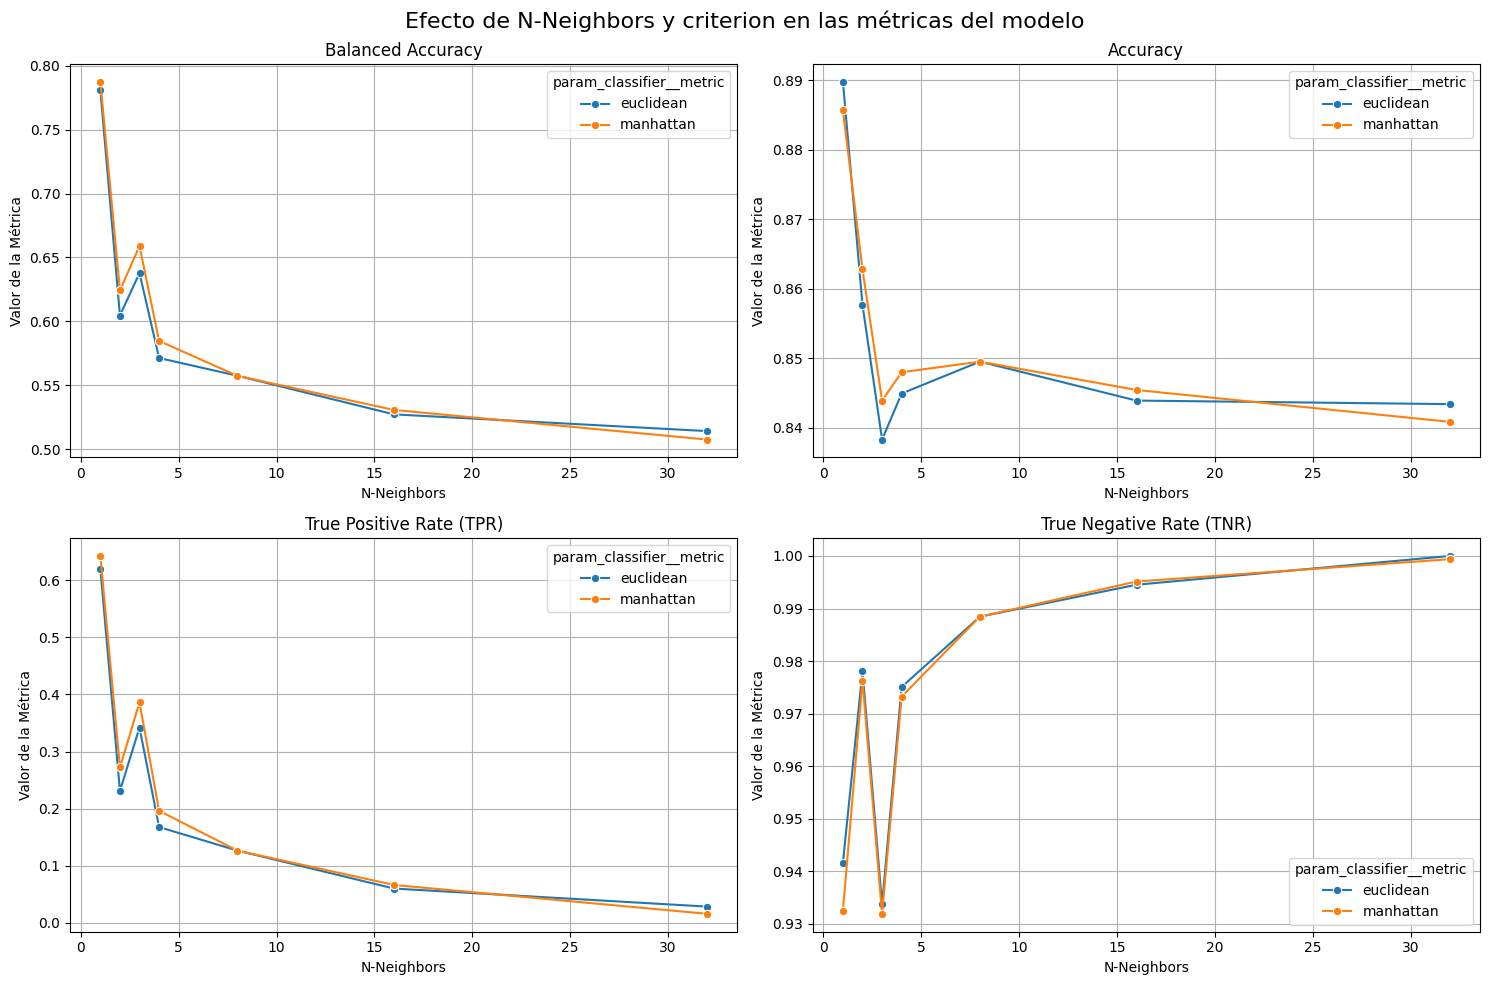

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico para cada métrica
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 filas, 2 columnas

# Definir métricas y etiquetas
metrics = ["mean_test_balanced_accuracy", "mean_test_accuracy", "mean_test_tpr", "mean_test_tnr"]
titles = ["Balanced Accuracy", "Accuracy", "True Positive Rate (TPR)", "True Negative Rate (TNR)"]

# Graficar cada métrica en un subplot
for ax, metric, title in zip(axes.flatten(), metrics, titles):
    sns.lineplot(
        data=cv_results,
        x="param_classifier__n_neighbors",
        y=metric,
        hue="param_classifier__metric",  # Diferenciar por criterio
        marker="o",
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel("N-Neighbors")
    ax.set_ylabel("Valor de la Métrica")
    ax.grid()

plt.suptitle("Efecto de N-Neighbors y criterion en las métricas del modelo", fontsize=16)
plt.tight_layout()
plt.show()


Se observa que cuantos menos neighbors haya, mayor será el balanced accuracy (siendo el valor con mayor balanced_accuracy n_neighbors=1) y mayor será tambien el TPR y el accuracy.   
Esto puede suponer que haya overfitting en el modelo porque se esta sobreadaptando al ruido de los datos train. Pero como la evaluacion se ha realizado con un cross-validation de 3 folds, suponemos que esto no ocurre.

El cambio de la metrica (elegir entre distancia euclída o distancia de Manhattan) no parece variar mucho pero es ligeramente mejor la distancia de Manhattan.



### *__4.2 - Decission Tree__*

Decision Tree con los hiperparámetros por defecto

Decision Tree con los hiperparámetros por defecto

In [41]:
from sklearn import tree

clf = Pipeline([("preprocessor", preprocessor), ("classifier", tree.DecisionTreeClassifier(random_state=42))])

#Para ver el arbol
"""
fig = plt.figure(figsize=(200,200))
_ = tree.plot_tree(clf.named_steps["classifier"],
                feature_names = clf.named_steps["preprocessor"].get_feature_names_out(),
                class_names= ['No', 'Yes'],
                filled=True)
"""

scr = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
mean_balanced_accuracy = scr["test_balanced_accuracy"].mean()
mean_accuracy = scr["test_accuracy"].mean()
mean_tpr = scr["test_tpr"].mean()
mean_tnr = scr["test_tnr"].mean()
time_def = scr["fit_time"].mean()

print(f"Mean balanced accuracy = {mean_balanced_accuracy}. Mean accuracy = {mean_accuracy}. Mean TPR = {mean_tpr}. Mean TNR = {mean_tnr}. Trained on: {time_def} seconds.")



Mean balanced accuracy = 0.7595690064117279. Mean accuracy = 0.862752949220488. Mean TPR = 0.6073375262054507. Mean TNR = 0.9118004866180048. Trained on: 0.08798456192016602 seconds.


Ajuste de hiperparámetros para el arbol:

Igual que anteriormente con KNN, hacemos GridSearch con Cross-Validation y comprobamos los mejores valores para los hiperparámetros criterio, profundidad máxima, mínimo de muestras para dividir un nodo y umbral para crear nuevas divisiones.

In [43]:
tree_grid = {
    'classifier__criterion': ['gini', 'entropy'],  # Función de evaluación
    'classifier__max_depth': [1, 2, 5, 10, None],  # Profundidad máxima del árbol
    'classifier__min_samples_split': [2, 10, 50],  # Mínimo de muestras para dividir un nodo
    'classifier__min_impurity_decrease': [0.0, 0.01, 0.05]  # Umbral para crear nuevas divisiones
}

grid = GridSearchCV(clf, tree_grid, cv=cv, scoring=scoring, refit='balanced_accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
tree_hpo = grid.best_estimator_

start_time = time.time()
tree_hpo.fit(X_train, y_train)  # Reentrenar solo con los mejores hiperparámetros
best_fit_time = time.time() - start_time
# Extraer resultados
cv_results = grid.cv_results_

mean_acc = np.max(cv_results["mean_test_accuracy"])  # Mejor Accuracy
mean_tpr = np.max(cv_results["mean_test_tpr"])  # Mejor TPR
mean_tnr = np.max(cv_results["mean_test_tnr"])  # Mejor TNR

print(f"Decision Tree con HPO:")
print(f"Mean balanced accuracy = {grid.best_score_}. Mean accuracy = {mean_acc}. Mean TPR = {mean_tpr}. Mean TNR = {mean_tnr}. Trained on: {best_fit_time} seconds.")
print("Mejores hiperparámetros:", grid.best_params_)


Decision Tree con HPO:
Mean balanced accuracy = 0.7595690064117279. Mean accuracy = 0.862752949220488. Mean TPR = 0.6073375262054507. Mean TNR = 1.0. Trained on: 0.0729978084564209 seconds.
Mejores hiperparámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_impurity_decrease': 0.0, 'classifier__min_samples_split': 2}


Los hiperparametros optimizados del Tree son los mismos que los default: el griterio gini, una profundidad maxima infinita (None), min_samples = 2 y min_impurity_decrease = 0


Se va a observar mediante un plot el cambio que produce en las diferentes métricas modificar la profundidad máxima del árbol, diferenciados por criterio gini o entropía.


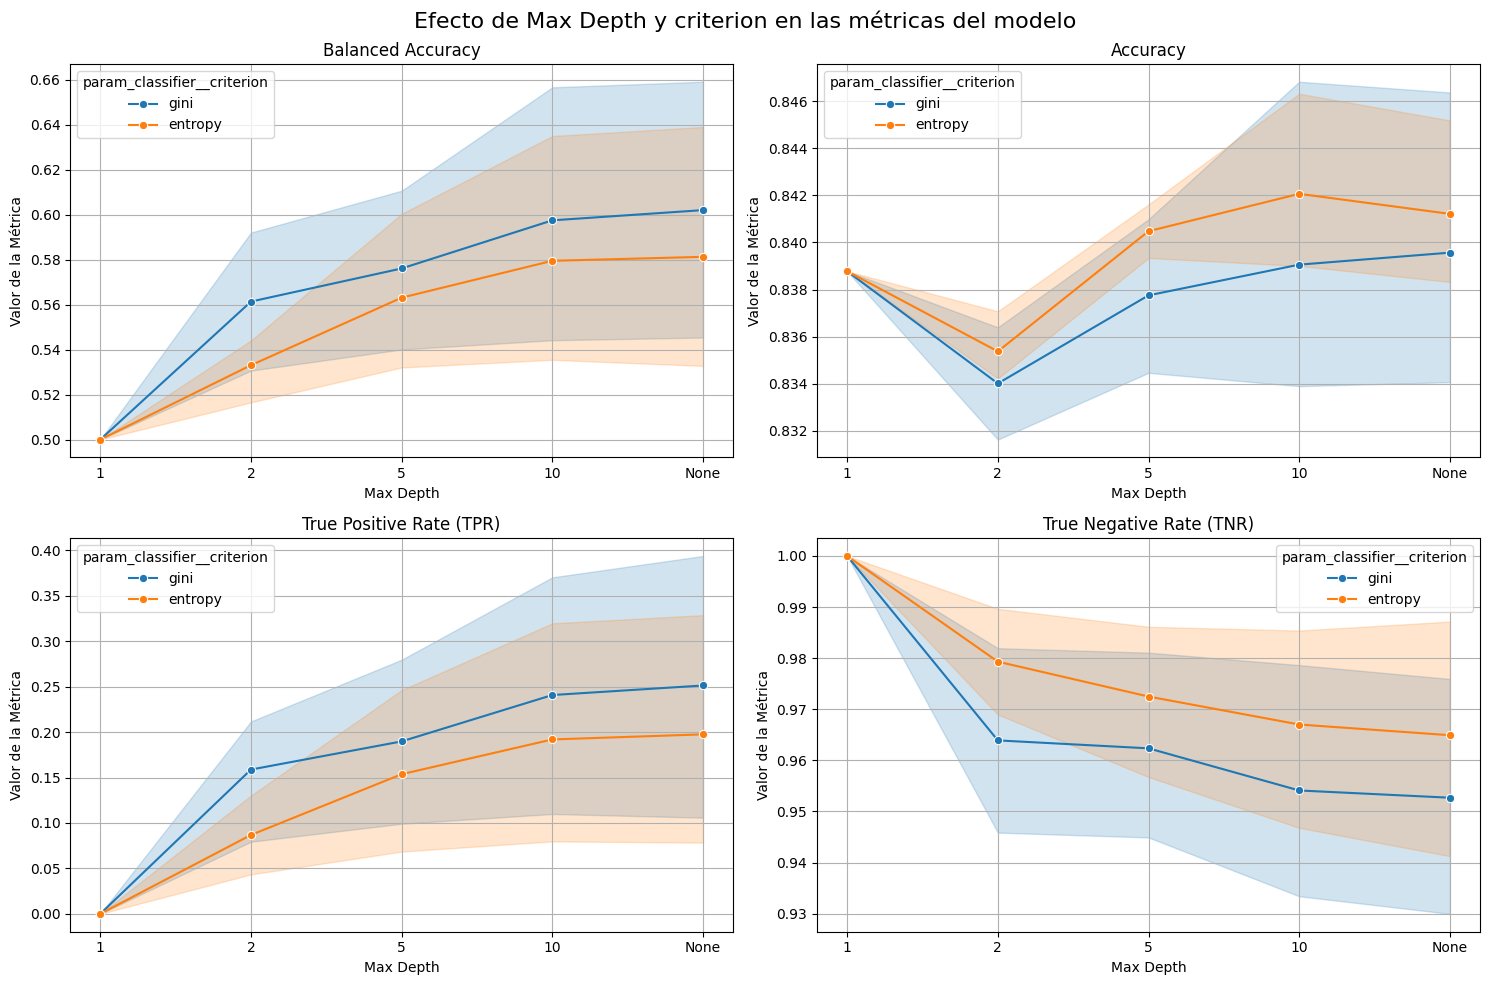

In [31]:
results_df = pd.DataFrame(grid.cv_results_)

# Convertir los valores de "max_depth" a números (algunos pueden ser None)
results_df["param_classifier__max_depth"] = results_df["param_classifier__max_depth"].astype(str)

# Crear un gráfico para cada métrica
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 filas, 2 columnas

# Definir métricas y etiquetas
metrics = ["mean_test_balanced_accuracy", "mean_test_accuracy", "mean_test_tpr", "mean_test_tnr"]
titles = ["Balanced Accuracy", "Accuracy", "True Positive Rate (TPR)", "True Negative Rate (TNR)"]

# Graficar cada métrica en un subplot
for ax, metric, title in zip(axes.flatten(), metrics, titles):
    sns.lineplot(
        data=results_df,
        x="param_classifier__max_depth",
        y=metric,
        hue="param_classifier__criterion",  # Diferenciar por criterio
        marker="o",
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel("Max Depth")
    ax.set_ylabel("Valor de la Métrica")
    ax.grid()

plt.suptitle("Efecto de Max Depth y criterion en las métricas del modelo", fontsize=16)
plt.tight_layout()
plt.show()


Cuanto mayor es max_depth, mejores métricas tiene el modelo por lo que lo mejor será dejarla en None para que tenga profundidad máxima ilimitada.

En el caso del criterio, se puede ver que usando gini obtiene una mejor balanced accuracy y TPR, y usando la entropía se obtiene una mayor accuracy y TNR. En este caso nos interesa más el TPR porque es la clase minoritaria y en la que queremos maximizar el acierto, por lo que nos quedaremos con gini como criterio.

### *__4.3 - Conclusiones de los métodos básicos__*


Tras evaluar 4 posibles modelos (KNN con/sin HPO y Tree con/sin HPO) hemos obtenido que el mejor modelo básico sería el KNN con HPO proporcionando un balanced_accuracy de un 78.7%. El coste computacional de entrenar este modelo es bajo (aprox. 0.015 seg).

Este modelo supera con creces el modelo dummy, como vemos el balanced_accuracy de dummy es de 51% mientras que el del KNN HPO es de un 78.7%. Aunque no se tenga muy en cuenta, también lo supera en accuracy pasando de un 74% a un 88%.

En KNN se observa un aumento del balanced_accuracy al hacer HPO mientras que en tree obtenemos que la mejor optimización es la default. En cuanto al coste computacional, se mantiene practicamente igual en la version por omisión que con HPO. También se observa que el KNN tarda la mitad aproximadamente en entrenar, esto cuadra con el comportamiento perezoso de este algoritmo a diferencia del arbol de decisón.

## *__5. Metodos Avanzados: Modelos Lineales y SVMs__*

### *__5.1 - Modelos lineales__*

Vamos a crear tres modelos lineales basados en la funcion Logisticregresion. Usando regularización Lasso (l1), Ridge (l2), o ninguna


In [46]:
from sklearn import linear_model

lista = [
    ("L2 Regularization", linear_model.LogisticRegression(solver="liblinear", penalty="l2")),
    ("L1 Regularization", linear_model.LogisticRegression(solver="liblinear", penalty="l1")),
    ("No Regularization", linear_model.LogisticRegression(solver="lbfgs", penalty=None))
]

for name, classifier in lista:
    clf = Pipeline([("preprocessor", preprocessor), ("classifier", classifier)])

    scr = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)

    mean_balanced_accuracy = scr["test_balanced_accuracy"].mean()
    mean_accuracy = scr["test_accuracy"].mean()
    mean_tpr = scr["test_tpr"].mean()
    mean_tnr = scr["test_tnr"].mean()
    time_i = scr["fit_time"].mean()

    print(f"{name}:")
    print(f"  Mean Balanced Accuracy = {mean_balanced_accuracy}")
    print(f"  Mean Accuracy          = {mean_accuracy}")
    print(f"  Mean TPR               = {mean_tpr}")
    print(f"  Mean TNR               = {mean_tnr}")
    print(f"  Training Time          = {time_i:.4f} sec\n")

L2 Regularization:
  Mean Balanced Accuracy = 0.6186046676853728
  Mean Accuracy          = 0.8576553287344694
  Mean TPR               = 0.2657981431566337
  Mean TNR               = 0.971411192214112
  Training Time          = 0.0637 sec

L1 Regularization:
  Mean Balanced Accuracy = 0.6182339111102367
  Mean Accuracy          = 0.8591867223026165
  Mean TPR               = 0.26262353998203053
  Mean TNR               = 0.9738442822384429
  Training Time          = 0.0723 sec

No Regularization:
  Mean Balanced Accuracy = 0.6202585895947692
  Mean Accuracy          = 0.8561239351663225
  Mean TPR               = 0.27214734950584013
  Mean TNR               = 0.9683698296836983
  Training Time          = 0.0730 sec



Se observa que los valores de las disntintas métricas de precisión son muy similares entre los tres modelos

Optimizacion de parámetros sin regularización

In [48]:
clf = Pipeline([("preprocessor", preprocessor), ("classifier", linear_model.LogisticRegression(penalty=None))])

lr_grid = {
    'classifier__solver': ['lbfgs', 'saga', 'newton-cg'],
    'classifier__tol': [1e-4, 1e-5, 1e-6],
    'classifier__max_iter': [100, 500, 1000],
    'classifier__class_weight': [None, 'balanced']
}

grid = GridSearchCV(clf, lr_grid, cv=cv, scoring=scoring, refit='balanced_accuracy', n_jobs=-1)

grid.fit(X_train, y_train)
best_model_lr = grid.best_estimator_

start_time = time.time()
best_model_lr.fit(X_train, y_train)  # Reentrenar solo con los mejores hiperparámetros
best_fit_time = time.time() - start_time
# Extraer resultados
cv_results = grid.cv_results_

mean_acc = np.max(cv_results["mean_test_accuracy"])  # Mejor Accuracy
mean_tpr = np.max(cv_results["mean_test_tpr"])  # Mejor TPR
mean_tnr = np.max(cv_results["mean_test_tnr"])  # Mejor TNR

print(f"LogisticRegression con HPO:")
print(f"Mean balanced accuracy = {grid.best_score_}. Mean accuracy = {mean_acc}. Mean TPR = {mean_tpr}. Mean TNR = {mean_tnr}. Trained on: {best_fit_time} seconds.")
print("Mejores hiperparámetros:", grid.best_params_)

LogisticRegression con HPO:
Mean balanced accuracy = 0.7401712891005. Mean accuracy = 0.8566343996890381. Mean TPR = 0.7339922132374962. Mean TNR = 0.968978102189781. Trained on: 0.1035456657409668 seconds.
Mejores hiperparámetros: {'classifier__class_weight': 'balanced', 'classifier__max_iter': 100, 'classifier__solver': 'lbfgs', 'classifier__tol': 1e-05}


Optimización de parámetros con regularización Lasso

In [50]:
clf = Pipeline([("preprocessor", preprocessor), ("classifier", linear_model.LogisticRegression(penalty="l1"))])

lr_grid = {
    'classifier__solver': ['liblinear', 'saga'],  # Solvers compatibles con L1
    'classifier__C': [0.01, 0.1, 1, 10],  # Regularización
    'classifier__tol': [1e-4, 1e-5, 1e-6],  # Precisión del solver
    'classifier__class_weight': [None, 'balanced']  # Manejo de clases desbalanceadas
}

grid = GridSearchCV(clf, lr_grid, cv=cv, scoring=scoring, refit='balanced_accuracy', n_jobs=-1)

grid.fit(X_train, y_train)
best_model_lr = grid.best_estimator_

start_time = time.time()
best_model_lr.fit(X_train, y_train)  # Reentrenar solo con los mejores hiperparámetros
best_fit_time = time.time() - start_time
# Extraer resultados
cv_results = grid.cv_results_

mean_acc = np.max(cv_results["mean_test_accuracy"])  # Mejor Accuracy
mean_tpr = np.max(cv_results["mean_test_tpr"])  # Mejor TPR
mean_tnr = np.max(cv_results["mean_test_tnr"])  # Mejor TNR

print(f"LogisticRegression con penalty l1 HPO:")
print(f"Mean balanced accuracy = {grid.best_score_}. Mean accuracy = {mean_acc}. Mean TPR = {mean_tpr}. Mean TNR = {mean_tnr}. Trained on: {best_fit_time} seconds.")
print("Mejores hiperparámetros:", grid.best_params_)

LogisticRegression con penalty l1 HPO:
Mean balanced accuracy = 0.7506441786189756. Mean accuracy = 0.8591867223026165. Mean TPR = 0.7624138963761605. Mean TNR = 1.0. Trained on: 0.1069943904876709 seconds.
Mejores hiperparámetros: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__solver': 'saga', 'classifier__tol': 0.0001}


### *__5.2 - SVMs__*

In [52]:
from sklearn import svm


clf = Pipeline([("preprocessor", preprocessor), ("classifier", svm.SVC())])

scr = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv) # evaluacion sin HPO

mean_balanced_accuracy = scr["test_balanced_accuracy"].mean()
mean_accuracy = scr["test_accuracy"].mean()
mean_tpr = scr["test_tpr"].mean()
mean_tnr = scr["test_tnr"].mean()
time_i = scr["fit_time"].mean()
print(f"SVC sin HPO:")
print(f"Mean balanced accuracy = {mean_balanced_accuracy}. Mean accuracy = {mean_accuracy}. Mean TPR = {mean_tpr}. Mean TNR = {mean_tnr}. Trained on: {time_i}")

svc_grid = {
    "classifier__C": [ 1, 10],
    "classifier__kernel": ["linear", "rbf", "poly", "sigmoid"],
    "classifier__gamma": ["scale", "auto"],
    "classifier__degree": [3, 4, 5],  # Solo para kernel "poly"
    "classifier__coef0": [0.0, 1.0]  # Solo para kernel "poly" y "sigmoid"
}

grid = GridSearchCV(clf, svc_grid, cv=cv, scoring=scoring, refit='balanced_accuracy', n_jobs=-1)

grid.fit(X_train, y_train)
best_model_svc = grid.best_estimator_

start_time = time.time()
best_model_svc.fit(X_train, y_train)  # Reentrenar solo con los mejores hiperparámetros
best_fit_time = time.time() - start_time
# Extraer resultados
cv_results = grid.cv_results_

mean_acc = np.max(cv_results["mean_test_accuracy"])  # Mejor Accuracy
mean_tpr = np.max(cv_results["mean_test_tpr"])  # Mejor TPR
mean_tnr = np.max(cv_results["mean_test_tnr"])  # Mejor TNR

print(f"SVC con HPO:")
print(f"Mean balanced accuracy = {grid.best_score_}. Mean accuracy = {mean_acc}. Mean TPR = {mean_tpr}. Mean TNR = {mean_tnr}. Trained on: {best_fit_time} seconds.")
print("Mejores hiperparámetros:", grid.best_params_)

SVC sin HPO:
Mean balanced accuracy = 0.6255114844909638. Mean accuracy = 0.8734711431439308. Mean TPR = 0.25953878406708597. Mean TNR = 0.9914841849148418. Trained on: 0.18270579973856607
SVC con HPO:
Mean balanced accuracy = 0.8125152751271743. Mean accuracy = 0.916835650717382. Mean TPR = 0.6803833483078767. Mean TNR = 1.0. Trained on: 0.280839204788208 seconds.
Mejores hiperparámetros: {'classifier__C': 10, 'classifier__coef0': 1.0, 'classifier__degree': 5, 'classifier__gamma': 'auto', 'classifier__kernel': 'poly'}


### *__5.3 - Atributos relevantes__*

Para comprobar cuales son los atributos más relevantes del modelo, se puede aprovechar la propiedad de sparsity de Lasso, que tiende a reducir a cero los coeficientes de las variables menos importantes

In [36]:
best_model_lr.fit(X_train, y_train)

coeficientes = best_model_lr.named_steps["classifier"].coef_[0]

encoded_columns = clf.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out()
print(encoded_columns)

feature_importance = pd.DataFrame({
    'Característica': [f'X{i+1}' for i in range(encoded_columns.shape[0])],
    'Coeficiente': coeficientes
})

# Ordenar por importancia
feature_importance = feature_importance.sort_values(by="Coeficiente", key=abs, ascending=False)

print(feature_importance)


AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

## __*6. Resultados y modelo final*__


Tras comparar los distintos modelos en base, principalmente, al balanced_accuracy, hemos llegado a la conclusión de que el mejor modelo es el Support Vector Machine con HPO.

In [54]:
best_model_global = best_model_svc

y_pred = best_model_global.predict(X_test)
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo global: {accuracy}")

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

bal_acc = (tp / (tp + fn) + tn / (tn + fp)) / 2
acc = (tp + tn) / (tp + tn + fp + fn)
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Evitar división por cero
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0  # Evitar división por cero
print(f"Balanced Accuracy: {bal_acc}")
print(f"Accuracy: {acc}")
print(f"TPR: {tpr}")
print(f"TNR: {tnr}")


Accuracy del modelo global: 0.8840124426375928
Balanced Accuracy: 0.8840124426375928
Accuracy: 0.9469387755102041
TPR: 0.7911392405063291
TNR: 0.9768856447688564


In [55]:
from pickle import dump

best_model_global.fit(X,y) # Modelo final entrenado con todos los datos

with open('modelo_final_10.pkl', 'wb') as f:
    dump(best_model_global, f) # Guardar el modelo entrenado

In [56]:
clf = Pipeline([("preprocessor", preprocessor), ("classifier", svm.SVC(C=10, coef0= 1.0, degree=5, gamma='auto', kernel='poly'))])

clf.fit(X, y)

y_pred = best_model_global.predict(X)

tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

bal_acc = (tp / (tp + fn) + tn / (tn + fp)) / 2
acc = (tp + tn) / (tp + tn + fp + fn)
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Evitar división por cero
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0  # Evitar división por cero
print(f"Balanced Accuracy: {bal_acc}")
print(f"Accuracy: {acc}")
print(f"TPR: {tpr}")
print(f"TNR: {tnr}")

Balanced Accuracy: 1.0
Accuracy: 1.0
TPR: 1.0
TNR: 1.0


## __*7. Tarea de elección abierta: RandomForest*__

Hemos decidido elegir el RandomForest ya que es considerado uno de los algoritmos más certeros del momento, es robusto al overfitting, es capáz de manejar eficientemente bases de datos extensas con muchos atributos (es escalable) y porque nos proporciona estimaciones de que variables son más importantes a la hora de clasificar.

In [62]:
from sklearn import ensemble


clf = Pipeline([("preprocessor", preprocessor), ("classifier", ensemble.RandomForestClassifier(random_state=42))])

scr = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv) # evaluacion sin HPO

mean_balanced_accuracy = scr["test_balanced_accuracy"].mean()
mean_accuracy = scr["test_accuracy"].mean()
mean_tpr = scr["test_tpr"].mean()
mean_tnr = scr["test_tnr"].mean()
time_i = scr["fit_time"].mean()
print(f"RandomForest sin HPO:")
print(f"Mean balanced accuracy = {mean_balanced_accuracy}. Mean accuracy = {mean_accuracy}. Mean TPR = {mean_tpr}. Mean TNR = {mean_tnr}. Trained on: {time_i}")

rf_grid = {
    'classifier__criterion': ['gini', 'entropy'],  # Función de evaluación
    'classifier__max_depth': [2, 5, 10, None],  # Profundidad máxima del árbol
    'classifier__min_samples_split': [2, 10, 50],  # Mínimo de muestras para dividir un nodo
    'classifier__min_impurity_decrease': [0.0, 0.01, 0.05]  # Umbral para crear nuevas divisiones
}

grid = GridSearchCV(clf, rf_grid, cv=cv, scoring=scoring, refit='balanced_accuracy', n_jobs=-1)

grid.fit(X_train, y_train)
best_model_rf = grid.best_estimator_

start_time = time.time()
best_model_rf.fit(X_train, y_train)  # Reentrenar solo con los mejores hiperparámetros
best_fit_time = time.time() - start_time
# Extraer resultados
cv_results = grid.cv_results_

mean_acc = np.max(cv_results["mean_test_accuracy"])  # Mejor Accuracy
mean_tpr = np.max(cv_results["mean_test_tpr"])  # Mejor TPR
mean_tnr = np.max(cv_results["mean_test_tnr"])  # Mejor TNR

print(f"RandomForest con HPO:")
print(f"Mean balanced accuracy = {grid.best_score_}. Mean accuracy = {mean_acc}. Mean TPR = {mean_tpr}. Mean TNR = {mean_tnr}. Trained on: {best_fit_time} seconds.")
print("Mejores hiperparámetros:", grid.best_params_)

RandomForest sin HPO:
Mean balanced accuracy = 0.7602054245009761. Mean accuracy = 0.9193879733309606. Mean TPR = 0.5252770290506139. Mean TNR = 0.9951338199513381. Trained on: 0.4873490333557129
RandomForest con HPO:
Mean balanced accuracy = 0.7602054245009761. Mean accuracy = 0.9193879733309606. Mean TPR = 0.5252770290506139. Mean TNR = 1.0. Trained on: 0.5733306407928467 seconds.
Mejores hiperparámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_impurity_decrease': 0.0, 'classifier__min_samples_split': 2}


Ahora comprobaremos que variables interfieren en mayor medida en la clasificación.

In [104]:
def get_feature_names(preprocessor, original_feature_names):
    output_features = []
    for name, transformer, columns in preprocessor.transformers_:
        if transformer == "drop":
            continue  # Ignorar columnas eliminadas
        elif transformer == "passthrough":
            output_features.extend(columns)  # Mantener columnas sin cambios
        else:
            try:
                # Si el transformador tiene un método get_feature_names_out
                output_features.extend(transformer.get_feature_names_out(columns))
            except AttributeError:
                # Si no, usar los nombres originales
                output_features.extend(columns)
    return output_features

# Obtener el preprocesador del pipeline
preprocessor = best_model_rf.named_steps["preprocessor"]


# Obtener los nombres de las columnas transformadas
feature_names = get_feature_names(preprocessor, X.columns)

feature_importance_df = pd.DataFrame({
    "Feature": np.array(feature_names)[sorted_indices],  # Ordenar los nombres según las importancias
    "Importance": sorted_importances
})

# Mostrar el DataFrame
print(feature_importance_df)



                              Feature  Importance
0                                 hrs    0.112521
1                       MonthlyIncome    0.065987
2                   TotalWorkingYears    0.060986
3                                 Age    0.058038
4                      YearsAtCompany    0.053742
5                YearsWithCurrManager    0.046024
6                   PercentSalaryHike    0.042337
7                    DistanceFromHome    0.041571
8                  NumCompaniesWorked    0.038121
9                            absences    0.033700
10            EnvironmentSatisfaction    0.032459
11                    JobSatisfaction    0.029864
12              TrainingTimesLastYear    0.028784
13            YearsSinceLastPromotion    0.027813
14                    WorkLifeBalance    0.024369
15                          Education    0.021560
16                     JobInvolvement    0.021138
17                           JobLevel    0.021021
18                   StockOptionLevel    0.020213
